<a href="https://colab.research.google.com/github/vkatari90/Practical-Data-Analytics-Solutions/blob/week1/Assignment_4_venkateshbabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
file_path = './breast-cancer.csv'
data = pd.read_csv(file_path)

In [9]:
data.head()

,ID,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0.0
1,1002945,5,4,4,5,7,10,3,2,1,0.0
2,1015425,3,1,1,1,2,2,3,1,1,0.0
3,1016277,6,8,8,1,3,4,3,7,1,0.0
4,1017023,4,1,1,3,2,1,3,1,1,0.0


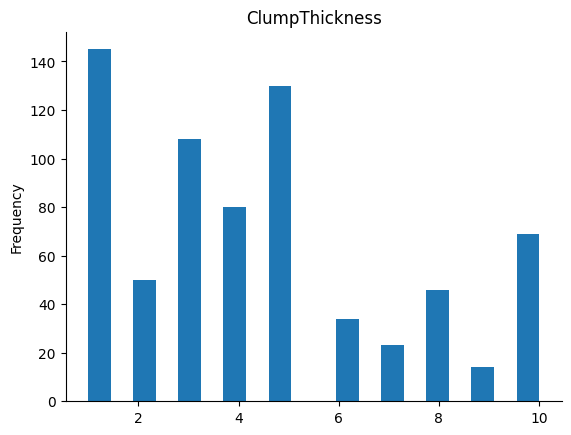

In [20]:
from matplotlib import pyplot as plt
data['ClumpThickness'].plot(kind='hist', bins=20, title='ClumpThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [13]:
pipelines = {
    'linear_svm': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear'))
    ]),
    'rbf_svm': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf'))
    ])
}

In [14]:
param_grids = {
    'linear_svm': {
        'svm__C': [0.1, 1, 10, 100]
    },
    'rbf_svm': {
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': [1e-3, 1e-4, 1e-5]
    }
}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [19]:
best_estimators = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Cross-validation training accuracy for {model_name}: {grid_search.best_score_:.4f}")

for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name}: {test_accuracy:.4f}")

Best parameters for linear_svm: {'svm__C': 0.1}
Cross-validation training accuracy for linear_svm: 0.9624
Best parameters for rbf_svm: {'svm__C': 100, 'svm__gamma': 0.001}
Cross-validation training accuracy for rbf_svm: 0.9642
Test accuracy for linear_svm: 0.9643
Test accuracy for rbf_svm: 0.9714
